<a href="https://colab.research.google.com/github/khanittha-phusopha/DWDM21/blob/main/MiniExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ข้อสอบ

จาก data ```flights.csv``` และ ```airports.csv``` ใน https://drive.google.com/drive/folders/1EFo1_uQgWkRiXjezL0T4YwteYrsqU5MV?usp=sharing
0. หารัฐที่มีจำนวนเครื่องบินขาเข้ามากที่สุดและน้อยที่สุด
1. หารัฐที่มีจำนวนเครื่องบินขาออกมากที่สุดและน้อยที่สุด
2. วาด Histogram แสดงจำนวนเครื่องบินขาออกของแต่ละวันในสัปดาห์
3. สายการบินไหนมีเที่ยวบินมากที่สุดและน้อยที่สุด
4. สายการบินอะไรมีความล่าช้ามากที่สุดและน้อยที่สุด
5. ช่วงเช้าหรือช่วงบ่ายมีเครื่องบินขาเข้ามากกว่ากัน

ให้นักศึกษาทำข้อสอบ 2 ข้อจากที่แสดงข้างบนโดยกรอกรหัสนักศึกษาลงใน function ```gen_exams()``` แล้ว run เพื่อให้ได้ข้อสอบที่นักศึกษาต้องทำ 2 ข้อ (ข้อละ 3 คะแนน)
และให้นักศึกษาคิดโจทย์เองอีก 1 ข้อ (4 คะแนน)


In [5]:
import pandas as pd

In [6]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import os

In [9]:
flights = pd.read_csv('/content/drive/MyDrive/Mini Exam/flights.csv')
flights

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า
0,19,5,DL,11433,13303,-3,1
1,19,5,DL,14869,12478,0,-8
2,19,5,DL,14057,14869,-4,-15
3,19,5,DL,15016,11433,28,24
4,19,5,DL,11193,12892,-6,-11
...,...,...,...,...,...,...,...
2702213,19,6,DL,13204,14869,1,-3
2702214,19,6,DL,10397,13495,-2,-3
2702215,19,6,DL,10140,10397,18,9
2702216,19,6,DL,10397,13244,10,7


In [10]:
airports = pd.read_csv('/content/drive/MyDrive/Mini Exam/airports.csv')
airports

,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
0,10165,Adak Island,AK,Adak
1,10299,Anchorage,AK,Ted Stevens Anchorage International
2,10304,Aniak,AK,Aniak Airport
3,10754,Barrow,AK,Wiley Post/Will Rogers Memorial
4,10551,Bethel,AK,Bethel Airport
...,...,...,...,...
360,11233,Cheyenne,WY,Cheyenne Regional/Jerry Olson Field
361,11097,Cody,WY,Yellowstone Regional
362,11865,Gillette,WY,Gillette Campbell County
363,12441,Jackson,WY,Jackson Hole


In [2]:
def gen_exams(ID):
    import math
    a = int(ID[-1])%6
    b = int(ID[-1])%3
    print(f'รหัสนักศึกษา {ID} ทำข้อ {a} และ {b if a != b else 5-b}')

ตัวอย่างการ run

In [4]:
gen_exams('623021042-5')

รหัสนักศึกษา 623021042-5 ทำข้อ 5 และ 2


In [15]:
merged = airports.merge(flights,how='left',left_on='รหัสสนามบิน',right_on='รหัสสนามบินต้นทาง')
merged

,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า
0,10165,Adak Island,AK,Adak,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10299,Anchorage,AK,Ted Stevens Anchorage International,19.0,5.0,DL,10299.0,14869.0,27.0,2.0
2,10299,Anchorage,AK,Ted Stevens Anchorage International,16.0,2.0,DL,10299.0,13487.0,-10.0,-38.0
3,10299,Anchorage,AK,Ted Stevens Anchorage International,16.0,2.0,DL,10299.0,13487.0,-3.0,-27.0
4,10299,Anchorage,AK,Ted Stevens Anchorage International,17.0,3.0,DL,10299.0,14869.0,-6.0,-23.0
...,...,...,...,...,...,...,...,...,...,...,...
2702508,11233,Cheyenne,WY,Cheyenne Regional/Jerry Olson Field,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2702509,11097,Cody,WY,Yellowstone Regional,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2702510,11865,Gillette,WY,Gillette Campbell County,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2702511,12441,Jackson,WY,Jackson Hole,NaN,NaN,NaN,NaN,NaN,NaN,NaN


dropna =ตัดค่าข้อมูลออก แต่ต้องอยู่ที่ไม่เกิน 10 เปอร์เซ็นที่ยอกรับได้

In [25]:
merged_removed = merged.shape[0] - merged.dropna().shape[0]

print(f'size before drop = {merged.shape[0]}')
print(f'size after drop = {merged.dropna().shape[0]}')
print(f'we lost {100*(removed/merged.shape[0])}% of data')

size before drop = 2702513
size after drop = 2702218
we lost 0.010915766177628008% of data


In [26]:
merged.dropna()

,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า
1,10299,Anchorage,AK,Ted Stevens Anchorage International,19.0,5.0,DL,10299.0,14869.0,27.0,2.0
2,10299,Anchorage,AK,Ted Stevens Anchorage International,16.0,2.0,DL,10299.0,13487.0,-10.0,-38.0
3,10299,Anchorage,AK,Ted Stevens Anchorage International,16.0,2.0,DL,10299.0,13487.0,-3.0,-27.0
4,10299,Anchorage,AK,Ted Stevens Anchorage International,17.0,3.0,DL,10299.0,14869.0,-6.0,-23.0
5,10299,Anchorage,AK,Ted Stevens Anchorage International,18.0,4.0,DL,10299.0,13487.0,-4.0,-31.0
...,...,...,...,...,...,...,...,...,...,...,...
2702496,13342,Milwaukee,WI,General Mitchell International,17.0,4.0,DL,13342.0,13487.0,-7.0,-23.0
2702497,13342,Milwaukee,WI,General Mitchell International,17.0,4.0,DL,13342.0,11433.0,23.0,26.0
2702498,13342,Milwaukee,WI,General Mitchell International,17.0,4.0,DL,13342.0,10397.0,3.0,7.0
2702499,13342,Milwaukee,WI,General Mitchell International,17.0,4.0,DL,13342.0,10397.0,-5.0,-7.0


In [28]:
merged_remove = merged.dropna()

##ข้อ2 วาด Histogram แสดงจำนวนเครื่องบินขาออกของแต่ละวันในสัปดาห์

* ต้นทาง=ออก

* ปลายทาง=เข้า


In [33]:
data_2 = merged_remove[['วันในสัปดาห์','รหัสสนามบินต้นทาง']] 
data_2

,วันในสัปดาห์,รหัสสนามบินต้นทาง
1,5.0,10299.0
2,2.0,10299.0
3,2.0,10299.0
4,3.0,10299.0
5,4.0,10299.0
...,...,...
2702496,4.0,13342.0
2702497,4.0,13342.0
2702498,4.0,13342.0
2702499,4.0,13342.0


In [34]:
from matplotlib import pyplot as plt

In [35]:
import numpy as np

In [36]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(20)
x

array([ 80.33582913,  96.31229766, 123.76178026,  81.71116229,
        83.10637064, 109.17838389, 102.97354779,  86.96159881,
       107.3586095 ,  80.33512308, 105.52499883,  80.1356315 ,
        91.56139472, 106.50269442, 102.28813014, 121.83029426,
       104.12728222,  98.85186386,  76.82131103, 124.10452512])

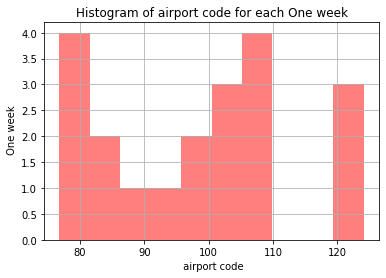

In [38]:
# Fixing random state for reproducibility
np.random.seed() #ไม่ระบุจุดเริ่มต้นในการแรนด้อม

# the histogram of the data
n, bins, patches = plt.hist(x, 10, facecolor='r', alpha=0.5)


plt.xlabel(' airport code')
plt.ylabel(' One week')
plt.title('Histogram of airport code for each One week')

plt.grid(True)
plt.show()

##ข้อ5 ช่วงเช้าหรือช่วงบ่ายมีเครื่องบินขาเข้ามากกว่ากัน

In [69]:
merged.groupby('วันในสัปดาห์').count()

,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน,วันในเดือน,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า
วันในสัปดาห์,,,,,,,,,,
1.0,407837,407837,407837,407837,407837,407837,407837,407837,407837,407837
2.0,397594,397594,397594,397594,397594,397594,397594,397594,397594,397594
3.0,403072,403072,403072,403072,403072,403072,403072,403072,403072,403072
4.0,406563,406563,406563,406563,406563,406563,406563,406563,406563,406563
5.0,396387,396387,396387,396387,396387,396387,396387,396387,396387,396387
6.0,318537,318537,318537,318537,318537,318537,318537,318537,318537,318537
7.0,372228,372228,372228,372228,372228,372228,372228,372228,372228,372228


##จะเห็นว่า ค่าที่คอลัมน์รหัสสนามบิน ของวันเสาร์และอาทิตย์มีค่าน้อยกว่าในแถวอื่นๆดังนั้น จะสรุปได้ว่า วันธรรมดามีเครื่องบินขาเข้ามากกว่าวันเสาร์-อาทิตย์

##ข้อที่คิดเอง หาสายการบินที่มีจำนวนเครื่องบินขาออกมากที่สุดและน้อยที่สุด





In [71]:
set(merged_remove['สายการบิน'])

{'9E',
 'AA',
 'AS',
 'B6',
 'DL',
 'EV',
 'F9',
 'FL',
 'HA',
 'MQ',
 'OO',
 'UA',
 'US',
 'VX',
 'WN',
 'YV'}

In [73]:
len(set(merged_remove['สายการบิน']))

16

In [76]:
Exam = merged_remove.groupby('สายการบิน').count().sort_values(by=['รหัสสนามบินต้นทาง'],ascending=False)
Exam

,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน,วันในเดือน,วันในสัปดาห์,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า
สายการบิน,,,,,,,,,,
WN,575739,575739,575739,575739,575739,575739,575739,575739,575739,575739
DL,381657,381657,381657,381657,381657,381657,381657,381657,381657,381657
AA,289855,289855,289855,289855,289855,289855,289855,289855,289855,289855
UA,286418,286418,286418,286418,286418,286418,286418,286418,286418,286418
US,233321,233321,233321,233321,233321,233321,233321,233321,233321,233321
OO,160164,160164,160164,160164,160164,160164,160164,160164,160164,160164
EV,157928,157928,157928,157928,157928,157928,157928,157928,157928,157928
B6,121906,121906,121906,121906,121906,121906,121906,121906,121906,121906
MQ,113212,113212,113212,113212,113212,113212,113212,113212,113212,113212


In [79]:
Exam.iloc[:1,:] 

,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน,วันในเดือน,วันในสัปดาห์,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า
สายการบิน,,,,,,,,,,
WN,575739,575739,575739,575739,575739,575739,575739,575739,575739,575739
